In [1]:
#import required packages
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
#Set all directories with different test conditions
baseDir = "C:/Users/abhir/Desktop/Fall_2020/ECE_578_Intelligent_Robotics_1/Project/Final1/ConfusionMat"
testDir1 = "Set_Similar_to_Train"
testDir2 = "Abhiraj_Simple_Test"
testDir3 = "Abhiraj_Different_Background_Test"
testDir4 = "Abhiraj_Extreme_Translation_Test"
testDir= [testDir1,testDir2,testDir3,testDir4]

In [3]:
os.chdir(baseDir)

In [4]:
#prediction syntax when using tflite model
def getPredict(img, interpreter, input_details, output_details):
    interpreter.set_tensor(input_details[0]['index'], img)
    interpreter.invoke()
    outputData = interpreter.get_tensor(output_details[0]['index'])
    return outputData
    pass

In [5]:
#preprocessing the image, Same as done while training the model
def preProcess(image):
    reszImg = cv2.resize(image, (224, 224))
    reszImg= cv2.cvtColor(reszImg, cv2.COLOR_BGR2RGB)
    preProsImg = tf.keras.applications.mobilenet.preprocess_input(reszImg)
    reshapImg = preProsImg.reshape(-1,224,224,3)
    return reshapImg
    pass

In [6]:
#function to create confusion matrix by passing CM array and its labels
def confMat(preds, lables):
    df_cm = pd.DataFrame(np.array(preds), lables, lables)
    plt.figure(figsize=(20,10))
    sn.set(font_scale=1.7) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g') # font size
    plt.show()

In [7]:
#Get interpreter details for tflite model
def getIntr(modName):
    interpreter = tf.lite.Interpreter(model_path=modName)
    interpreter.allocate_tensors()
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    return interpreter, input_details, output_details

In [8]:
#load tflite model to be used for prediction
interMain, inputMain, outputMain = getIntr("mainModel.tflite")
print('Main Model Loaded')

Main Model Loaded


In [9]:
#dictionary corresponding to numerical value of the gesture
dectFolder= {"five":5, "four":4, "ok":7, "one":1, "rock":9, "spider_man":8, "three":3, "thumbsup":6, "two":2, "zero":0}

In [10]:
#Initialize Comfussion Matrix for all tests with 0 value
predArray= np.zeros((4,10,10))

In [11]:
#Start predicting the test folders and update corresponding Confusion matrix
#Load Test Folder
for i in range(0,4):
    print(testDir[i])
    #gesture in corresponding test directory
    for subs in os.listdir(testDir[i]):
        print(subs)
        #load images in gesture folder and predict and update confussion matrix
        for images in os.listdir(os.path.join(testDir[i], subs)):
            img = cv2.imread(os.path.join(testDir[i], subs, images))
            prosimg = preProcess(img)
            pred = getPredict(prosimg, interMain, inputMain, outputMain)
            predArray[i][dectFolder[subs]][np.argmax(pred[0])] = predArray[i][dectFolder[subs]][np.argmax(pred[0])] + 1
    print("")

Set_Similar_to_Train
five
four
ok
one
rock
spider_man
three
thumbsup
two
zero

Abhiraj_Simple_Test
five
four
ok
one
rock
spider_man
three
thumbsup
two
zero

Abhiraj_Different_Background_Test
five
four
ok
one
rock
spider_man
three
thumbsup
two
zero

Abhiraj_Extreme_Translation_Test
five
four
ok
one
rock
spider_man
three
thumbsup
two
zero



In [12]:
#label for confussion matrix
lables = ["Zero","One","Two","Three","Four","Five","Thumbs Up","Ok","Spider-man","Rock"]

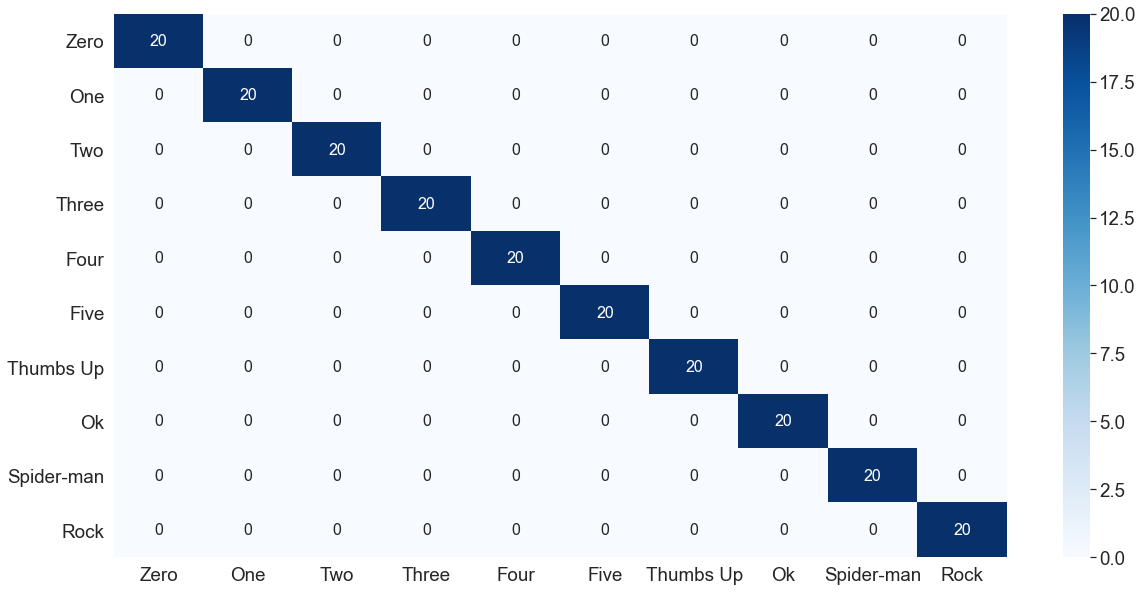

In [13]:
#Confussion Matrix for test set 1
confMat(predArray[0], lables)

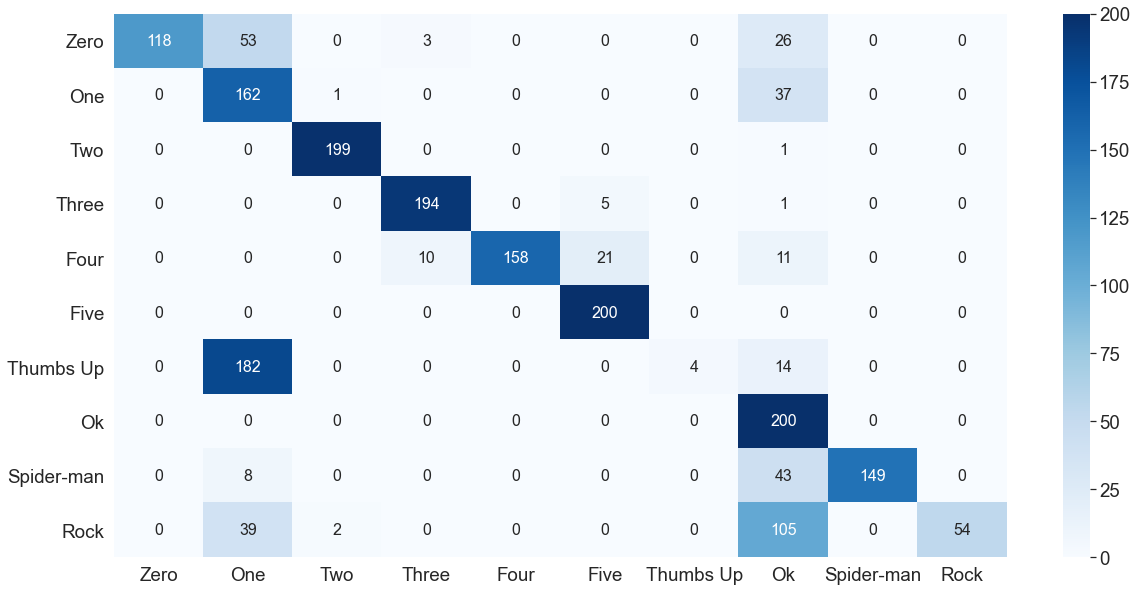

In [14]:
#Confussion Matrix for test set 2
confMat(predArray[1], lables)

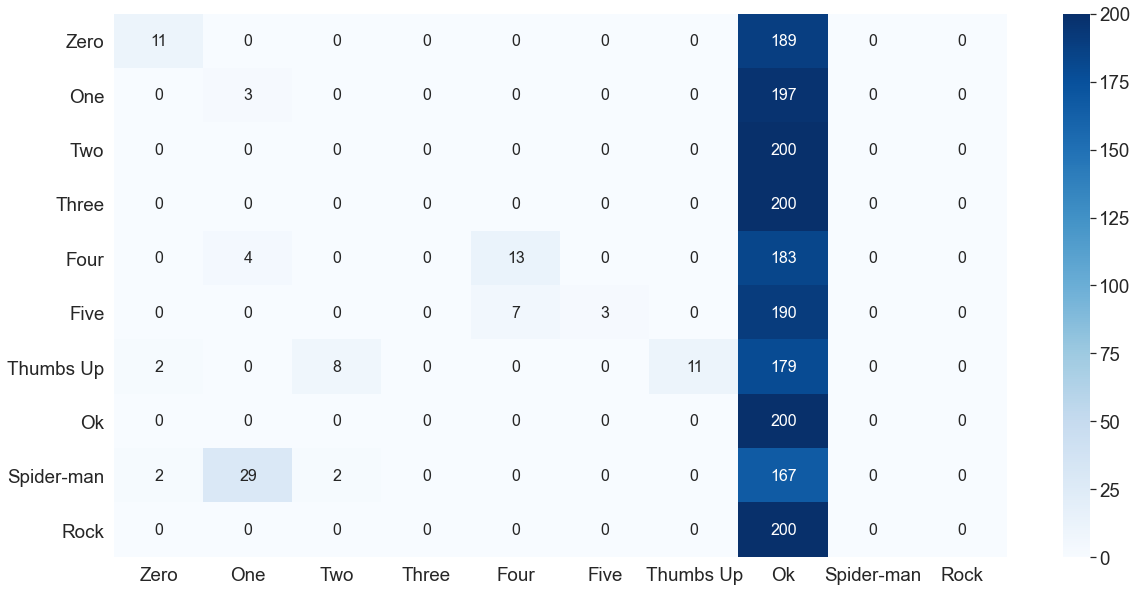

In [15]:
#Confussion Matrix for test set 3
confMat(predArray[2], lables)

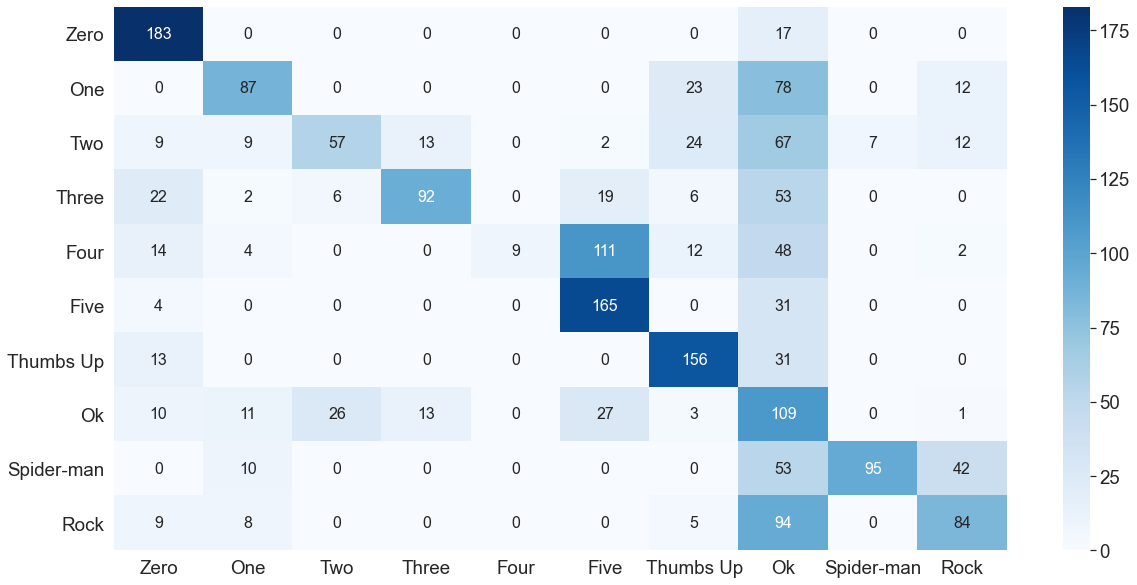

In [16]:
#Confussion Matrix for test set 4
confMat(predArray[3], lables)